<a href="https://colab.research.google.com/github/priya-gurjar24/Salary-prediction-using-ensemble/blob/main/IBMpbel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving salary_data (1).csv to salary_data (1).csv
{'salary_data (1).csv': b'Age,Gender,Education Level,Job Title,Years of Experience,Salary\n35.61,Other,Bachelor,Manager,30.36,42029.47\n58.08,Female,PhD,Manager,4.1,31991.1\n49.55,Other,High School,Manager,20.55,109406.24\n44.35,Other,PhD,Data Scientist,20.36,102293.93\n27.08,Male,Bachelor,Analyst,14.77,49562.29\n27.08,Male,PhD,Consultant,37.32,58057.54\n23.27,Other,Master,Software Engineer,33.1,32844.93\n54.78,Male,High School,Software Engineer,27.89,130193.66\n44.44,Female,Bachelor,Manager,28.57,146962.87\n48.61,Female,Bachelor,Analyst,18.47,46255.14\n21.8,Male,Bachelor,Data Scientist,36.84,57777.03\n58.83,Female,High School,Analyst,27.78,134209.14\n53.47,Male,Master,Analyst,29.16,141175.66\n29.28,Other,Bachelor,Data Scientist,34.47,80355.29\n28.09,Other,PhD,Manager,10.96,36074.7\n28.15,Female,Bachelor,Analyst,32.28,34727.02\n32.87,Male,Bachelor,Software Engineer,7.81,98873.98\n41.47,Male,Bachelor,Data Scientist,13.81,77147.41\n37.85,

**Import Packages / Libraries :**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data File / Csv File:**

In [5]:
sal_data = pd.read_csv("salary_data (1).csv")
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,35.61,Other,Bachelor,Manager,30.36,42029.47
1,58.08,Female,PhD,Manager,4.10,31991.10
2,49.55,Other,High School,Manager,20.55,109406.24
3,44.35,Other,PhD,Data Scientist,20.36,102293.93
4,27.08,Male,Bachelor,Analyst,14.77,49562.29


**Number of Rows and Columns :**

In [6]:
sal_data.shape

(1050, 6)

**List of Columns:**

In [7]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

**Rename Columns:**

In [8]:
sal_data.columns = ['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_year',
       'Salary']

In [10]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary
0,35.61,Other,Bachelor,Manager,30.36,42029.47
1,58.08,Female,PhD,Manager,4.10,31991.10
2,49.55,Other,High School,Manager,20.55,109406.24
3,44.35,Other,PhD,Data Scientist,20.36,102293.93
4,27.08,Male,Bachelor,Analyst,14.77,49562.29


**Column Datatypes:**

In [9]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_Title,object
Experience_year,float64
Salary,float64


**Information of Dataset :**

In [11]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1050 non-null   float64
 1   Gender           1050 non-null   object 
 2   Degree           1050 non-null   object 
 3   Job_Title        1050 non-null   object 
 4   Experience_year  1050 non-null   float64
 5   Salary           1050 non-null   float64
dtypes: float64(3), object(3)
memory usage: 49.3+ KB


**Duplicated Records in data:**

In [12]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_year,Salary
1000,35.85,Female,High School,Consultant,28.21,77520.12
1001,52.85,Other,Master,Software Engineer,5.02,59855.01
1002,39.04,Male,PhD,Data Scientist,27.10,123060.64
1003,34.89,Female,Master,Consultant,8.75,120153.47
1004,58.05,Female,PhD,Analyst,3.08,102610.74
1005,58.81,Female,PhD,Software Engineer,8.73,47603.41
1006,39.04,Other,Bachelor,Analyst,12.56,90006.99
1007,54.78,Other,Master,Manager,27.64,46798.49
1008,23.56,Male,PhD,Data Scientist,39.34,52815.45
1009,41.23,Male,PhD,Data Scientist,29.46,113082.52


In [13]:
sal_data[sal_data.duplicated()].shape

(50, 6)

**Dropping Duplicates from the data:**

In [14]:
sal_data1 = sal_data.drop_duplicates(keep = 'first')

**Missing / Null values in each columns:**

In [15]:
sal_data1.isnull().sum()

,0
Age,0
Gender,0
Degree,0
Job_Title,0
Experience_year,0
Salary,0


**Dropping Missing Vlues from data:**

In [16]:
sal_data1.dropna(how = 'any' , inplace=True)
sal_data1.shape

/tmp/ipython-input-1491879557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how = 'any' , inplace=True)


(1000, 6)

**Size of the data after droping duplicates and null values:**

In [17]:
sal_data1.shape

(1000, 6)

In [18]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary
0,35.61,Other,Bachelor,Manager,30.36,42029.47
1,58.08,Female,PhD,Manager,4.10,31991.10
2,49.55,Other,High School,Manager,20.55,109406.24
3,44.35,Other,PhD,Data Scientist,20.36,102293.93
4,27.08,Male,Bachelor,Analyst,14.77,49562.29


# **Data Exploration and Visualization :**
**Statics of numerical columns :**

In [19]:
sal_data1.describe()

,Age,Experience_year,Salary
count,1000.000000,1000.000000,1000.000000
mean,40.120060,19.919220,88556.669930
std,11.393322,11.419604,34586.890945
min,21.180000,0.030000,30003.690000
25%,30.202500,10.015000,58365.792500
50%,40.375000,19.925000,87870.600000
75%,50.025000,29.587500,118165.505000
max,59.990000,39.980000,149729.930000


**correlation Matrix among Numerical Features:**

In [21]:
corr = sal_data1[['Age','Experience_year','Salary']].corr()
corr

,Age,Experience_year,Salary
Age,1.000000,-0.023148,0.043515
Experience_year,-0.023148,1.000000,-0.036184
Salary,0.043515,-0.036184,1.000000


<Axes: >

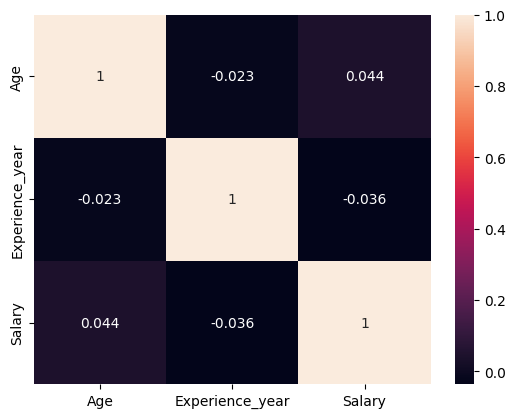

In [22]:
sns.heatmap(corr , annot = True)

**Data Visualization - Bar Chart,Box plot,Histogram**

In [24]:
sal_data1['Degree'].value_counts()

,count
Degree,
PhD,273
Bachelor,256
High School,247
Master,224


<Axes: xlabel='Degree'>

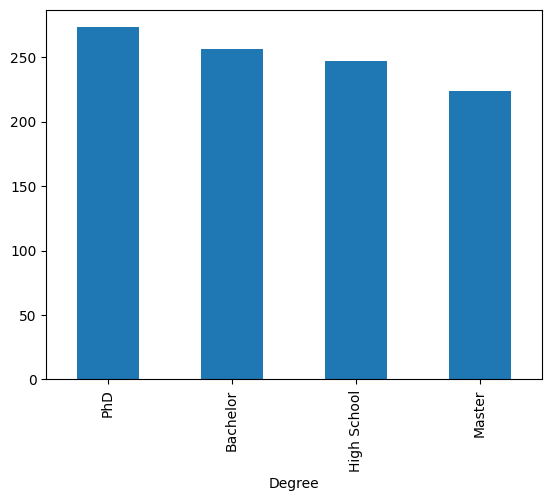

In [25]:
sal_data1['Degree'].value_counts().plot(kind = 'bar')

In [29]:
sal_data1['Job_Title'].value_counts()

,count
Job_Title,
Manager,209
Data Scientist,208
Consultant,208
Analyst,207
Software Engineer,168


<Axes: ylabel='Gender'>

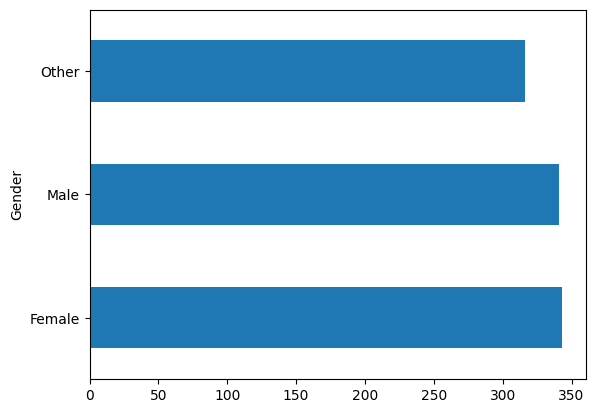

In [30]:
sal_data1['Gender'].value_counts().plot(kind = 'barh')

**Numerical Variable - Plot Histogram / box plot:**

<Axes: ylabel='Frequency'>

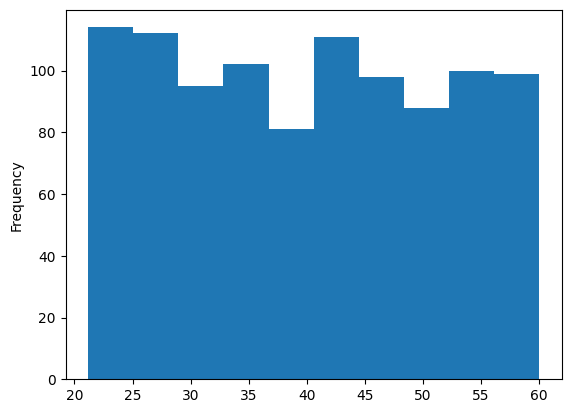

In [32]:
sal_data1.Age.plot(kind = 'hist')

<Axes: >

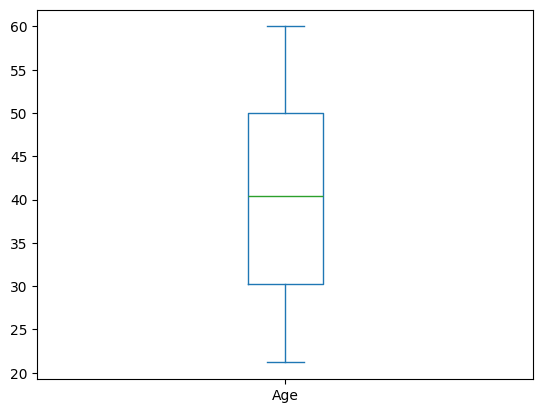

In [33]:
sal_data1.Age.plot(kind = 'box')

<Axes: >

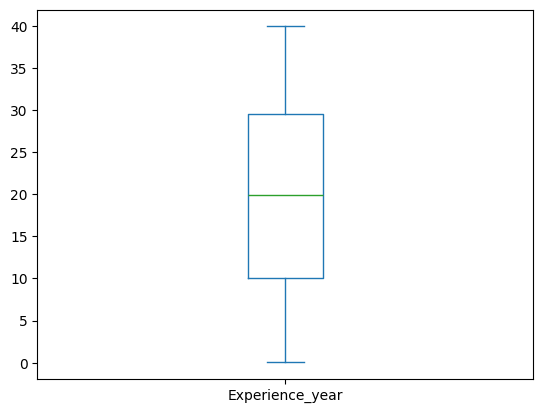

In [34]:
sal_data1.Experience_year.plot(kind = 'box')

<Axes: >

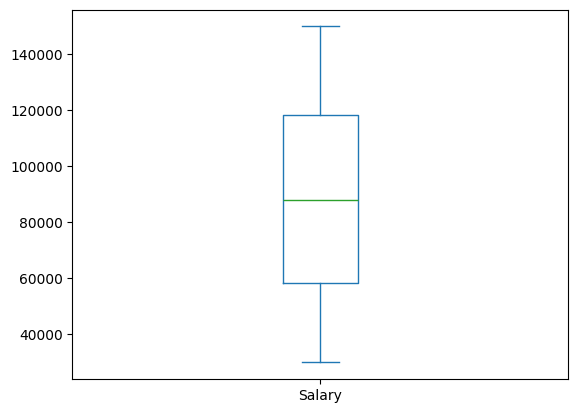

In [36]:
sal_data1.Salary.plot(kind = 'box')

<Axes: ylabel='Frequency'>

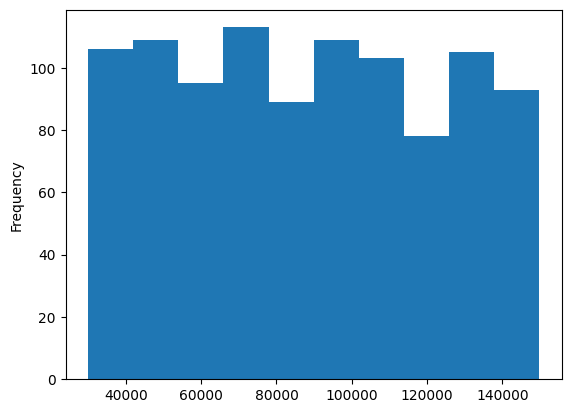

In [37]:
sal_data1.Salary.plot(kind = 'hist')

In [39]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary
0,35.61,Other,Bachelor,Manager,30.36,42029.47
1,58.08,Female,PhD,Manager,4.10,31991.10
2,49.55,Other,High School,Manager,20.55,109406.24
3,44.35,Other,PhD,Data Scientist,20.36,102293.93
4,27.08,Male,Bachelor,Analyst,14.77,49562.29


# **Feature Engineering :**
**Label Encoding :**

In [40]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [41]:
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])

/tmp/ipython-input-1017469824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])


In [52]:
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])

/tmp/ipython-input-446779904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])


In [54]:
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

/tmp/ipython-input-840262182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])


**Data afetr Label Encoding :**

**Feature Scalling :**

In [57]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary,Gender_Encode,Degree_Encoder,Job_Title_Encode,Age_scaled,Experience_year_scaled,Degree_Encode
0,35.61,Other,Bachelor,3,30.36,42029.47,2,0,3,-0.396049,0.914743,0
1,58.08,Female,PhD,3,4.10,31991.10,0,3,3,1.577146,-1.385962,3
2,49.55,Other,High School,3,20.55,109406.24,2,1,3,0.828087,0.055264,1
3,44.35,Other,PhD,2,20.36,102293.93,2,3,2,0.371451,0.038618,3
4,27.08,Male,Bachelor,0,14.77,49562.29,1,0,0,-1.145108,-0.451136,0


In [48]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [49]:
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_year_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_year']])

/tmp/ipython-input-1122524303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
/tmp/ipython-input-1122524303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_year_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_year']])


**Data After scalling :**

In [58]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary,Gender_Encode,Degree_Encoder,Job_Title_Encode,Age_scaled,Experience_year_scaled,Degree_Encode
0,35.61,Other,Bachelor,3,30.36,42029.47,2,0,3,-0.396049,0.914743,0
1,58.08,Female,PhD,3,4.10,31991.10,0,3,3,1.577146,-1.385962,3
2,49.55,Other,High School,3,20.55,109406.24,2,1,3,0.828087,0.055264,1
3,44.35,Other,PhD,2,20.36,102293.93,2,3,2,0.371451,0.038618,3
4,27.08,Male,Bachelor,0,14.77,49562.29,1,0,0,-1.145108,-0.451136,0


**Dependent and independent features:**

In [61]:
x=sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_year_scaled']]
y=sal_data1['Salary']

In [62]:
x.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_year_scaled
0,-0.396049,2,0,3,0.914743
1,1.577146,0,3,3,-1.385962
2,0.828087,2,1,3,0.055264
3,0.371451,2,3,2,0.038618
4,-1.145108,1,0,0,-0.451136


**splitting the data into Training and Testing:**

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
x_train.shape,y_train.shape #80%

((800, 5), (800,))

In [66]:
x_test.shape,y_test.shape  #20%

((200, 5), (200,))

In [67]:
x_train.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_year_scaled
29,-1.520077,0,2,0,0.828883
535,1.556948,0,3,0,-0.336364
695,0.411845,0,0,2,-1.017989
557,-1.580669,2,0,4,1.068065
836,1.454205,1,0,0,-0.345125


# **Model development :**

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
Linear_regression_model = LinearRegression()

**Model Training:**

In [70]:
Linear_regression_model.fit(x_train,y_train)

LinearRegression()

**Model predictions:**

In [71]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr

array([85014.26662839, 95543.91379188, 87023.59628648, 86434.05257924,
       90407.88884798, 95251.08725402, 87149.32617019, 92432.7586527 ,
       82474.720014  , 87265.54373603, 93885.88408373, 91263.03406305,
       91373.70329994, 89234.2214904 , 81429.81467078, 87050.8853435 ,
       93761.10922224, 86916.25783777, 87555.09252879, 85303.37156634,
       89579.1464774 , 89971.89017702, 80818.95556214, 86061.8956703 ,
       91289.50296633, 90494.27160505, 87923.27534327, 91085.99612993,
       82007.07701349, 90261.23654341, 91999.30113547, 95136.18980961,
       84983.20693448, 91313.44321484, 84936.42805193, 90509.3002395 ,
       87086.55695637, 90973.67789064, 82960.21850217, 88414.8168761 ,
       86204.051647  , 86686.39044587, 83286.61771988, 86876.40081995,
       84891.52159891, 91381.24835494, 86507.79882287, 85755.61647013,
       84238.51576156, 84753.59203902, 87894.72471587, 88055.1261225 ,
       89533.33601028, 90936.4469923 , 85364.74473583, 89403.67308479,
      

In [73]:
df = pd.DataFrame({'y_Actual':y_test,'y_predicted': y_pred_lr})
df

,s.no,name,jobtitle,agencyid,agency,hire_date,hire_month,hire_year,annualsalary
0,0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310
1,1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428
2,2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300
3,3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000
4,4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999
...,...,...,...,...,...,...,...,...,...
18890,18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,21,5,2014,11310
18891,18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,21,5,2014,11310
18892,18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,17,12,2013,43999
18893,18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,23,1,2013,44104


In [73]:
df = pd.DataFrame({'y_Actual':y_test,'y_predicted': y_pred_lr})
df['Error'] = df['y_Actual'] - df['y_predicted']
df['abs_error']=abs(df['Error'])
Mean_absolute_Error =df['abs_error'].mean()
Mean_absolute_Error

np.float64(29349.414031236767)

**Model Evaluation :**

In [74]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_squared_error , mean_absolute_error

**Model Accuracy :**

In [92]:
r2_score(y_test,y_pred_lr)

-0.014279695454626928

In [93]:
print(f'Accuracy of the model = {round(r2_score(y_test,y_pred_lr),4)*100}%')

Accuracy of the model = -1.43%


**Model Absolute Error :**

In [94]:
round(mean_absolute_error(y_test,y_pred_lr),2)

29349.41

In [95]:
print(f"Mean Absolute Error = {round(mean_absolute_error(y_test,y_pred_lr),2)}")

Mean Absolute Error = 29349.41


**Mean Squared Error:**

In [96]:
mse = round(mean_squared_error(y_test,y_pred_lr),2)
mse

1149610317.79

In [97]:
print(f"Mean Squared Error = {round(mean_squared_error(y_test,y_pred_lr),2)}")

Mean Squared Error = 1149610317.79


**Root Mean Squared Error :**

In [98]:
print('Root Mean Squared Error (RMSE)= ',mse**(0.5))

Root Mean Squared Error (RMSE)=  33905.90387808589


**coefficients:**

In [99]:
Linear_regression_model.coef_

array([ 2462.5476518 ,   467.45039292,  -282.624009  ,  1308.35004598,
       -1120.27868476])

**Intercepts:**

In [100]:
Linear_regression_model.intercept_

np.float64(85725.67513907213)

**Customise Predictions:**

In [101]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary,Gender_Encode,Degree_Encoder,Job_Title_Encode,Age_scaled,Experience_year_scaled,Degree_Encode
0,35.61,Other,Bachelor,3,30.36,42029.47,2,0,3,-0.396049,0.914743,0
1,58.08,Female,PhD,3,4.10,31991.10,0,3,3,1.577146,-1.385962,3
2,49.55,Other,High School,3,20.55,109406.24,2,1,3,0.828087,0.055264,1
3,44.35,Other,PhD,2,20.36,102293.93,2,3,2,0.371451,0.038618,3
4,27.08,Male,Bachelor,0,14.77,49562.29,1,0,0,-1.145108,-0.451136,0




*   Age = 58.08
*   Gener = 'Female'
*   Degree = 'PhD'= 3
*   Job_Title = 'Manager'= 3
*   Experience_Years = 4.10
*   Salary = ?



In [109]:
Age1 = std_scaler.transform([[44.35]])
Age = 0.37145
Gender = 2
Degree = 3
Job_Title = 2
Experience_year = std_scaler.transform([[20.36]])
Experience_year = 0.038618
# Find the Salary = ?

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [111]:
std_scaler.transform([[20.36]])[0],[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([0.03861785]), [0])

In [112]:
Emp_Salary = Linear_regression_model.predict([[Age,Gender,Degree,Job_Title,Experience_year]])
Emp_Salary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([89300.85439289])

In [113]:
print("Salary of that Employee with the above Attributes = ", Emp_Salary[0])

Salary of that Employee with the above Attributes =  89300.85439288583
